# Visualizing FordGoBike Data(2017)


<a id='intro'></a>
## Introduction

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> See the data [here](https://www.fordgobike.com/system-data)

<a id='prelim'></a>
## Preliminary Wrangling

In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

> Loading in the dataset

In [0]:
df = pd.read_csv('fordgo_master.csv')

In [4]:
# Showing the first five rows of the newly combined dataset
df.head()

duration_sec                start_time  ... bike_id   user_type
0         80110  2017-12-31 16:57:39.6540  ...      96    Customer
1         78800  2017-12-31 15:56:34.8420  ...      88    Customer
2         45768  2017-12-31 22:45:48.4110  ...    1094    Customer
3         62172  2017-12-31 17:31:10.6360  ...    2831    Customer
4         43603  2017-12-31 14:23:14.0010  ...    3167  Subscriber

[5 rows x 13 columns]

In [5]:
# Sampling the data helps the analyst understand the required cleaning needed, and get a feel for the data
df.sample(10)

duration_sec                start_time  ... bike_id   user_type
343868          1831  2017-09-15 15:42:19.4620  ...    2364    Customer
390487           182  2017-08-31 18:30:28.2530  ...    2688  Subscriber
397286          1511  2017-08-29 18:45:29.3040  ...    1634  Subscriber
469005           761  2017-08-02 16:58:09.9690  ...    1089  Subscriber
76631            340  2017-12-04 12:15:08.9270  ...    2670  Subscriber
25042            677  2017-12-18 19:00:32.3550  ...    3025  Subscriber
29844            934  2017-12-17 12:15:33.8930  ...    3253  Subscriber
46110           1570  2017-12-12 16:56:50.2600  ...    1645  Subscriber
147714           455  2017-11-10 09:48:40.6940  ...    3187  Subscriber
463249          2255  2017-08-04 19:32:00.1980  ...    1392    Customer

[10 rows x 13 columns]

In [6]:
# Let's take a peak into the data's basic information
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
df.shape

(519700, 13)

In [8]:
# Let's also get some additional description for stats figures
df.describe()

duration_sec  start_station_id  ...  end_station_longitude        bike_id
count  519700.000000     519700.000000  ...          519700.000000  519700.000000
mean     1099.009521         95.034245  ...            -122.363236    1672.533079
std      3444.146451         86.083078  ...               0.105122     971.356959
min        61.000000          3.000000  ...            -122.444293      10.000000
25%       382.000000         24.000000  ...            -122.410345     787.000000
50%       596.000000         67.000000  ...            -122.398525    1728.500000
75%       938.000000        139.000000  ...            -122.391034    2520.000000
max     86369.000000        340.000000  ...            -121.874119    3733.000000

[8 rows x 8 columns]

In [9]:
# Any duplicates?
df.duplicated().sum()
# No duplicates here - that was straightforward

0

In [10]:
# What about NaN values?
df.isna().sum()
# It looks like some of the starting and ending values are NaN, along with member birth years and genders

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

### Cleaning

Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned (from left to right):
- There are missing values throughout the dataset (start_station_id, start_station_name, end_station_id, end_station_name, )
- Start/end times are not in the timestamp format
- The following columns are not in object format: 
  - start_station_id
  - end_station_id
  - bike_id


In [0]:
# Save the original data set and save as a new, cleaned version while I clean things up
df_cleaned = df.copy()

##### Define: Missing values - I will hold on cleaning these up until later. It may or may not present an issue. 
##### Code: N/A
##### Test: N/A

##### Define: Converting several of the columns to the appropriate data type:
- Starting and ending times to the timestamp format
- Bike ID, start station ID, and end station ID to object format

##### Code: see below

In [0]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [0]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

##### Test: 

In [16]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

##### Define: Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units
##### Code: see below

In [0]:
# Start time month (January - December)
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')

In [0]:
# Start time month (1-12)
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month.astype(int)

In [0]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [0]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

In [0]:
# Duration in seconds to duration in minutes
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

##### Test: 

In [25]:
df_cleaned.sample(5)

duration_sec              start_time  ... end_time_hour duration_min
167183           432 2017-11-05 12:15:06.424  ...            12            7
237723           546 2017-10-16 17:24:49.750  ...            17            9
102203           611 2017-11-27 08:58:35.258  ...             9           10
267365          1386 2017-10-07 11:00:23.720  ...            11           23
399665           757 2017-08-29 08:16:09.846  ...             8           12

[5 rows x 19 columns]

In [26]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

##### Define: Calculate the total distance traveled using the latitude and longitude in the data set
##### Code: see below

##### Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface. Thank you Google for providing a way to figure this out! Reference is listed in the sources at the end of this document. 

In [0]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [0]:
# Using the calcuated math on our columns for lat and long
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [0]:
# Converting the kilometers to miles
df_cleaned['distance_miles'] = df_cleaned['distance_km'] * 0.621371

In [30]:
df_cleaned.sample(5)
# Phew! Let's not do any additional math for this analysis. But this is pretty cool

duration_sec              start_time  ... distance_km distance_miles
281748           650 2017-10-03 17:24:13.985  ...    1.528577       0.949813
310189           259 2017-09-25 18:25:32.062  ...    0.874872       0.543620
116641           395 2017-11-20 16:17:54.693  ...    1.076638       0.668991
428072           712 2017-08-18 17:52:24.039  ...    1.527901       0.949393
250762           324 2017-10-12 09:35:09.753  ...    0.731751       0.454689

[5 rows x 21 columns]

##### Save the cleaned data set to a new file

In [0]:
df_cleaned.to_csv('fordgo_master_clean.csv', index = False)

### What is the structure of your dataset?

> The FordGoBike data is straightforward and intuitive to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions from.

> This notebook uses data collected from January 2018 through April 15, 2019. There were approximately 1,850,000 bike rides in the San Francisco Bay area of California, USA documented.

> The column header descriptions are as follows (each trip is anonymized):
- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
     
> I added the following columns in my cleaning efforts:	
- Start Time Month	
- Start Time Month Number	
- Start Time Day of the Week	
- Start Time Hour
- Distance (km)
- Distance (miles)

### What is/are the main feature(s) of interest in your dataset?

> The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service including their age, gender, and whether they are a paying member or a casual user. These features can be used to make business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information will be utilized heavily. I will use the customer related data, as well as the distance to understand the user-driven data behind each ride.

-----------------

<a id='univariate'></a>
## Univariate Exploration

> In this section, I investigate distributions of individual variables. This is also in preparation to look at the relationships between variables.

In [0]:
# Removing the rainbow colors and setting to the variable no_color
no_color = sb.color_palette()[0]

In [33]:
# Before we visualize our data, let's see what kind of numbers we're looking at
df_cleaned.start_time_month.describe()

count      519700
unique          7
top       October
freq       108937
Name: start_time_month, dtype: object

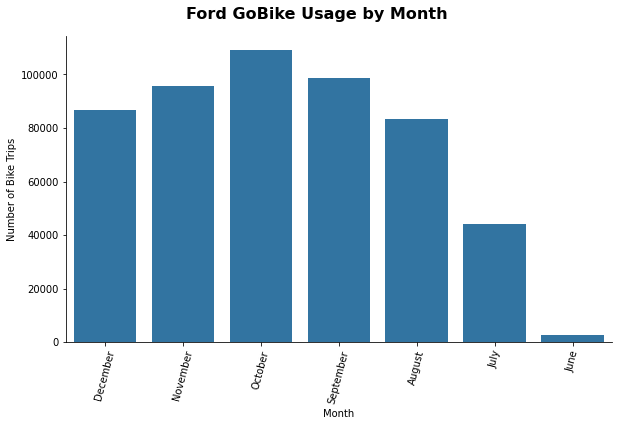

In [34]:
# Monthly usage of the Ford Go Bike system
graph = sb.catplot(data = df_cleaned, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

graph.set_xticklabels(rotation=75);

##### Observation 1: Not surprisingly, the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.  

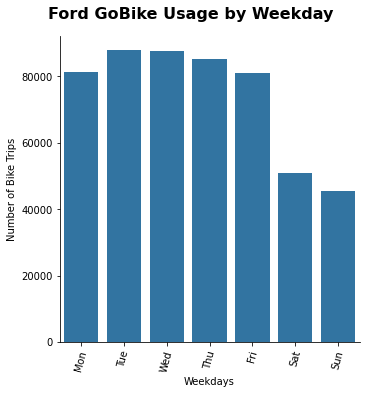

In [35]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df_cleaned, x='start_time_weekday', kind='count', color = no_color, order = weekday)

graph.set_axis_labels('Weekdays', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

##### Observation 2: Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

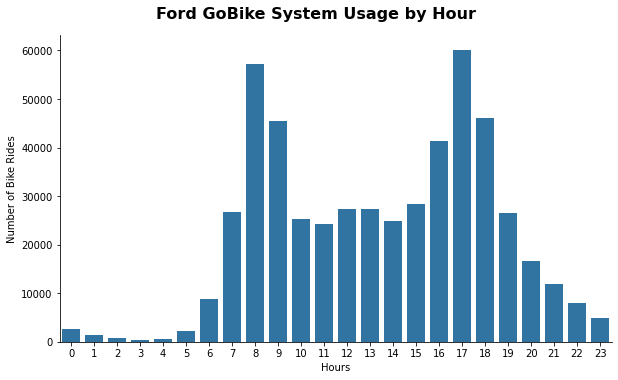

In [36]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

##### Observation 3: The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters. 

In [37]:
df_cleaned.duration_min.describe()

count    519700.000000
mean         17.825757
std          57.403474
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1439.000000
Name: duration_min, dtype: float64

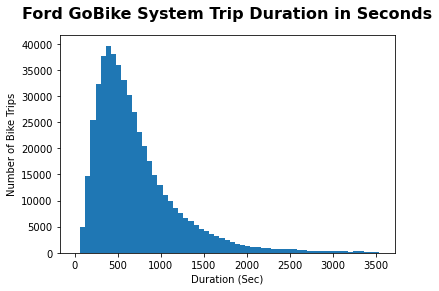

In [38]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df_cleaned, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

In [39]:
df_cleaned.duration_min.describe(percentiles = [.95])
df_cleaned.duration_min.describe()

count    519700.000000
mean         17.825757
std          57.403474
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max        1439.000000
Name: duration_min, dtype: float64

In [40]:
df_cleaned.duration_min.mean()

17.82575716759669

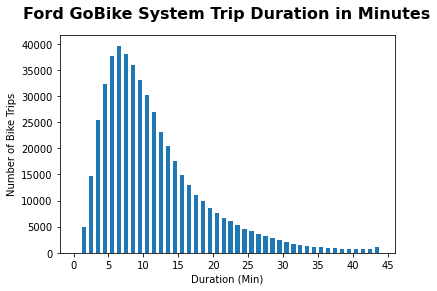

In [41]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

##### Observation 4: The average trip is just under 12.5 minutes, with 75% of trips being under 14 minutes. Looking at the histogram, most rides fall in between the 3 - 11 minute range. This suggests riders are taking the bikes short distances. 

In [42]:
df_cleaned.distance_miles.describe()

count    519700.000000
mean          0.986163
std           0.627828
min           0.000000
25%           0.559012
50%           0.870071
75%           1.287788
max          42.369292
Name: distance_miles, dtype: float64

In [43]:
df_cleaned.distance_miles.mean()

0.9861634901419503

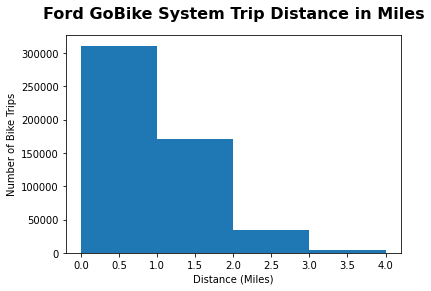

In [44]:
# Distance in miles traveled
bin_edges = np.arange(0, 5, 1)

plt.hist(data = df_cleaned, x = 'distance_miles', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

##### Observation 5: The mean distance traveled is 0.99 miles, with 75% of rides being 1.29 miles or less. Looking at the histogram above a majority of the rides fall under 2 miles, with over half of those 1 mile of less. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thankfully, due to thorough cleaning efforts there were no big surprises during the exploratory and visualization phase. The duration of the bike ride and the distance gave me a little trouble since there were some outliers I didn't anticipate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes. 

----------------

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the
data.

In [0]:
# Customers vs Subscribers
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

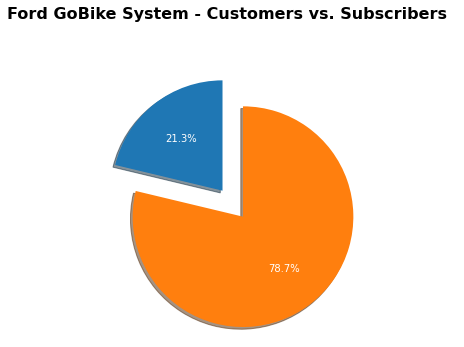

In [47]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

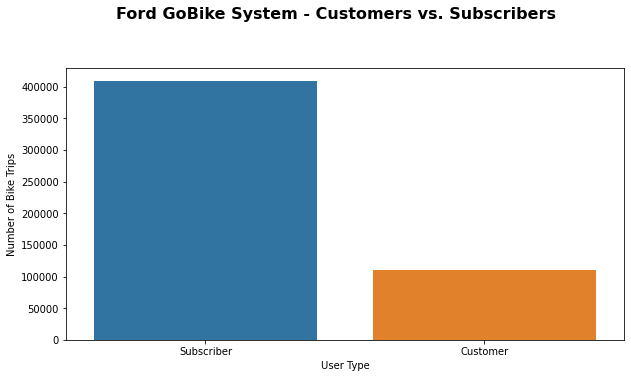

In [48]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_cleaned, x = "user_type", order = df_cleaned.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


##### Observation 1: The majority of users for the Ford Go Bike System are Subscribers i.e. customers who subscribe to the monthly membership. Customers pay by trip which is $2 per trip.

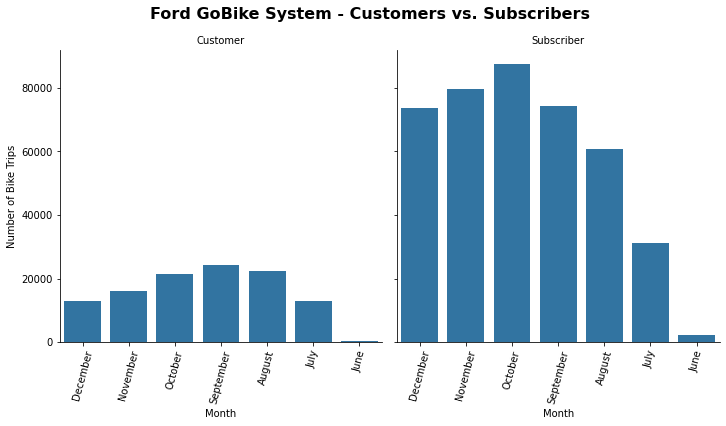

In [49]:
# Customer Usage by Month vs. Subscriber Usage by Month
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observation 2: Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather. 


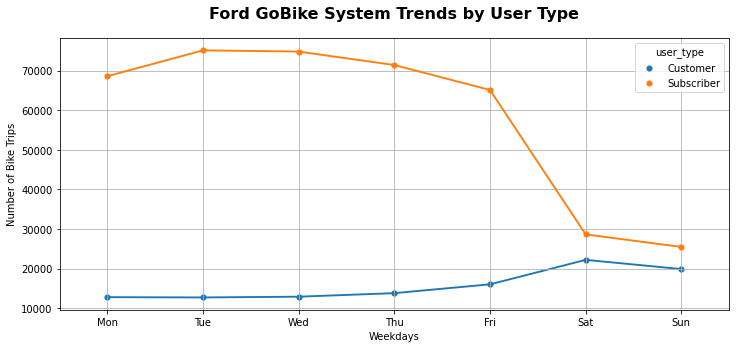

In [50]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

##### Observation 3: The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

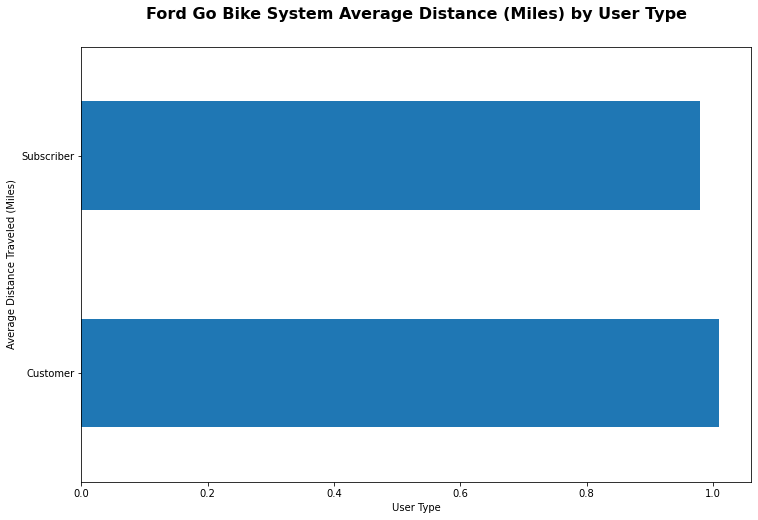

In [51]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = df_cleaned.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (Miles)');

##### Observation 4: The average distance traveled by customers is slightly higher than subscribers. Since the data exploration thus far suggests subscribers are using the bike share system for commuting purposes, that suggestion also implies that the commuting distance for the subscribers is less than the average ride a customer takes. 

In [52]:
df_cleaned.duration_min.describe(percentiles = [.95])

count    519700.000000
mean         17.825757
std          57.403474
min           1.000000
50%           9.000000
95%          37.000000
max        1439.000000
Name: duration_min, dtype: float64

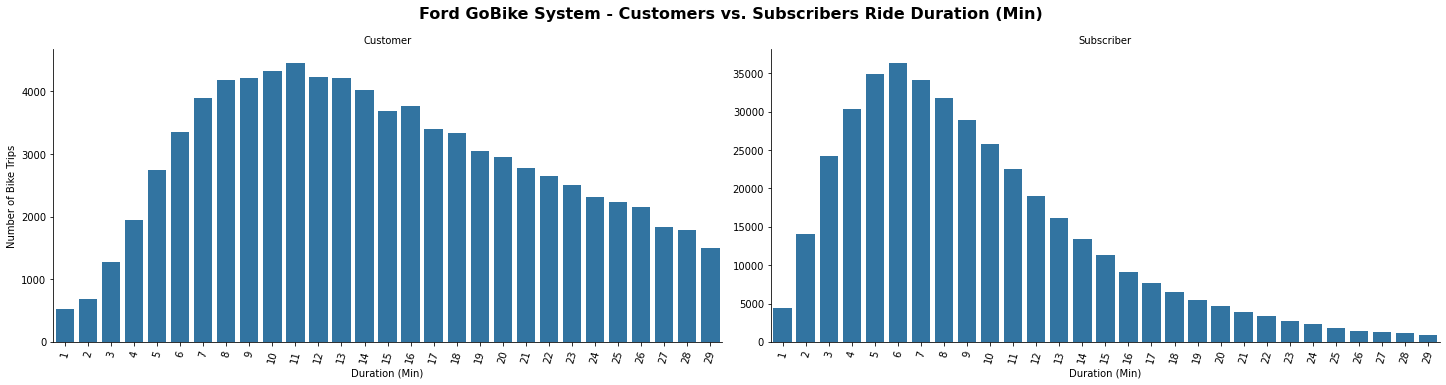

In [53]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_cleaned.query('duration_min < 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

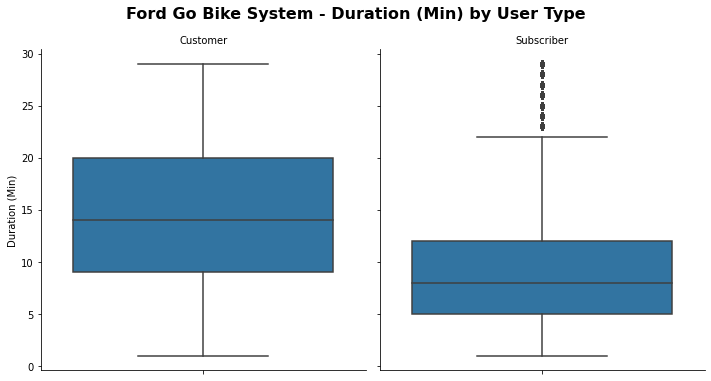

In [54]:
data = df_cleaned.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

##### Observation 5: The plots above show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

----------------

<a id='multivariate'></a>
## Multivariate Exploration

> I created plots of three or more variables to investigate the Ford Go Bike data even further.

##### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook. 

TypeError: ignored

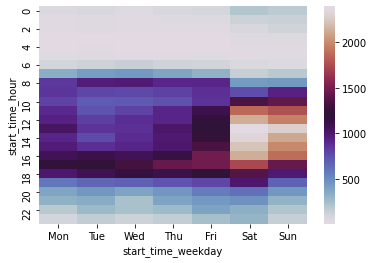

In [56]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

#graph.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

##### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook. 

TypeError: ignored

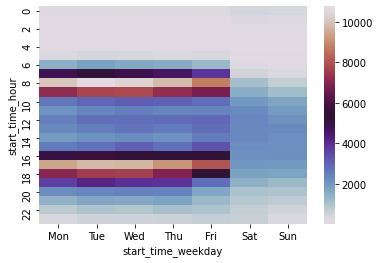

In [57]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

##### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook. 

##### Observation 2: Customers use the bike sharing system more often on weekends, whilte Subscribers primarily use the bikes on weekdays. 
##### Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.
##### Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section essentially amplified the previous data topics of exploration through different visuals and adding in more variables to compare to other variables. The heatmap didn't reveal anything new for the time based discussion on when and what time each user group uses the bike sharing system. As previously noted, Customers use the system at almost the opposite time as the Subscribers. 


------------------

<a id='summary'></a>
## Summary

This project is a win - win situation where a large number of people can benefit from this program:
- Environmentally friendly, budget friendly, and lifetsyle friendly. 
- Subscribers (i.e. daily commuters) benefit from a health commuting choice
- Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
- Affordable and convenient transportation for the people of all socioeconomic classes

Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

------------------

<a id='sources'></a>
## Sources

- [FordGoBike Data Set](https://www.fordgobike.com/)
- [Haversine formula](https://www.movable-type.co.uk/scripts/latlong.html) used to calculate distances using latitude and longitude
- [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) documentation
- [Matplotlib histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) documentation
- [IPython Display](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) documentation
- [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) documentation and [tutorial](https://likegeeks.com/seaborn-heatmap-tutorial/)